In [34]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns


In [3]:
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Emy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
news=pd.read_csv('train.csv')
news

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [5]:
news.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
news.dropna(inplace=True)

In [8]:
news.shape

(18285, 5)

In [9]:
news.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [10]:
news['content']=news['title']+news['author']
news

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You FiredConsortiumnew...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Rapper T.I.: Trump a ’Poster Child For White S...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Macy’s Is Said to Receive Takeover Approach by...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [12]:
import re
re.sub('[^a-zA-z]',' ','22hAFt hfh(hhh)')

'  hAFt hfh hhh '

In [15]:
porter_st=PorterStemmer()
porter_st.stem('computation')

'comput'

In [16]:
def preprocess(content):
    processed_content=re.sub('[^a-zA-z]',' ',content)
    processed_content=processed_content.lower()
    processed_content=processed_content.split()
    processed_content=[porter_st.stem(word) for word in processed_content if not word in stopwords.words('english')]
    processed_content=' '.join(processed_content)
    return processed_content


In [17]:
news['content_processed']=news['content'].apply(preprocess)
news

,id,title,author,text,label,content,content_processed
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,hous dem aid even see comey letter jason chaff...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",flynn hillari clinton big woman campu breitbar...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You FiredConsortiumnew...,truth might get firedconsortiumnew com
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...,civilian kill singl us airstrik identifiedjess...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...,iranian woman jail fiction unpublish stori wom...
...,...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Rapper T.I.: Trump a ’Poster Child For White S...,rapper trump poster child white supremaci jero...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",n f l playoff schedul matchup odd new york tim...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Macy’s Is Said to Receive Takeover Approach by...,maci said receiv takeov approach hudson bay ne...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"NATO, Russia To Hold Parallel Exercises In Bal...",nato russia hold parallel exercis balkansalex ...


In [21]:
X=news['content_processed']
y=news['label']

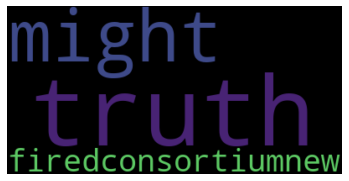

In [20]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(news['content_processed'][2])
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
X

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get firedconsortiumnew com
3        civilian kill singl us airstrik identifiedjess...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkansalex ...
20799                            keep f alivedavid swanson
Name: content_processed, Length: 18285, dtype: object

In [23]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [24]:
tf=TfidfVectorizer()


In [28]:
martrix=tf.fit_transform(X)

In [29]:
y.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [30]:
X_train,X_test,y_train,y_test=train_test_split(martrix,y,stratify=y,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [35]:
def train(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred_t=clf.predict(X_train)
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_pred_t,y_train))
    print(classification_report(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    plt.show()


1.0
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2591
           1       0.97      0.99      0.98      1981

    accuracy                           0.98      4572
   macro avg       0.98      0.99      0.98      4572
weighted avg       0.98      0.98      0.98      4572



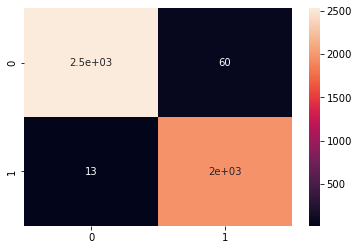

In [36]:
clf=RandomForestClassifier()
train(clf,X_train,X_test,y_train,y_test)

0.9869466929191278
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2591
           1       0.95      0.98      0.97      1981

    accuracy                           0.97      4572
   macro avg       0.97      0.97      0.97      4572
weighted avg       0.97      0.97      0.97      4572



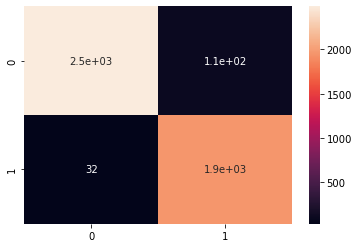

In [37]:
clf=LogisticRegression()
train(clf,X_train,X_test,y_train,y_test)

0.9652154889520893
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2591
           1       1.00      0.81      0.89      1981

    accuracy                           0.92      4572
   macro avg       0.94      0.90      0.91      4572
weighted avg       0.93      0.92      0.92      4572



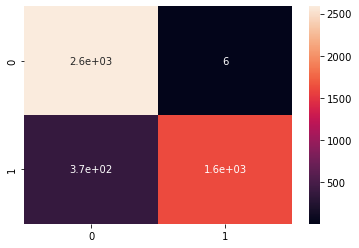

In [38]:
clf=MultinomialNB()
train(clf,X_train,X_test,y_train,y_test)

0.4632100926128491
              precision    recall  f1-score   support

           0       1.00      0.03      0.07      2591
           1       0.44      1.00      0.61      1981

    accuracy                           0.45      4572
   macro avg       0.72      0.52      0.34      4572
weighted avg       0.76      0.45      0.30      4572



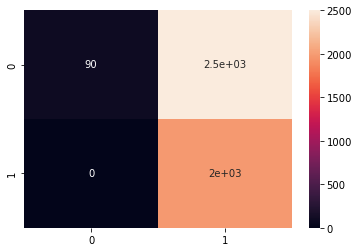

In [39]:
clf=KNeighborsClassifier()
train(clf,X_train,X_test,y_train,y_test)

0.9320352949755706
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2591
           1       0.86      1.00      0.92      1981

    accuracy                           0.93      4572
   macro avg       0.93      0.94      0.93      4572
weighted avg       0.94      0.93      0.93      4572



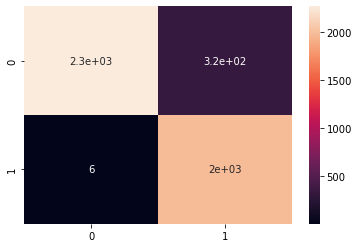

In [40]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
clf=GradientBoostingClassifier()
train(clf,X_train,X_test,y_train,y_test)

0.9570480565886386
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2591
           1       0.91      0.99      0.95      1981

    accuracy                           0.96      4572
   macro avg       0.95      0.96      0.96      4572
weighted avg       0.96      0.96      0.96      4572



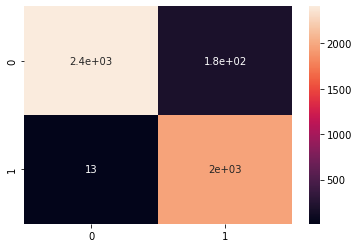

In [41]:
clf=AdaBoostClassifier()
train(clf,X_train,X_test,y_train,y_test)